In [1]:
import pandas as pd

sales_df=pd.read_csv(r'C:\Users\babuk\Downloads\Pizza_Sale.csv')
Ingredients_df=pd.read_csv(r'C:\Users\babuk\Downloads\Pizza_ingredients.csv')

In [3]:
sales_df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [5]:
sales_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
ingredients_mapping = sales_df[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()

In [9]:
# convert it into dictionary
ingredients_mapping = ingredients_mapping.set_index('pizza_name')['pizza_ingredients'].to_dict()

In [11]:
# map the values accordingly to fill the nulls
sales_df['pizza_ingredients'] = sales_df['pizza_ingredients'].fillna(sales_df['pizza_name'].map(ingredients_mapping))

In [13]:
Ingredients_df.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [15]:
sales_df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients     0
pizza_name            7
dtype: int64

In [17]:
name_mapping = sales_df[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()

In [19]:
name_mapping = name_mapping.set_index('pizza_name')['pizza_name_id'].to_dict()

In [21]:
sales_df['pizza_name_id'] = sales_df['pizza_name_id'].fillna(sales_df['pizza_name'].map(name_mapping))

In [23]:
category_mapping = sales_df[['pizza_name', 'pizza_category']].dropna().drop_duplicates()

In [25]:
category_mapping = category_mapping.set_index('pizza_name')['pizza_category'].to_dict()

In [27]:
sales_df['pizza_category'] = sales_df['pizza_category'].fillna(sales_df['pizza_name'].map(category_mapping))

In [29]:
nameid_mapping = sales_df[['pizza_name_id', 'pizza_name']].dropna().drop_duplicates()

In [31]:
nameid_mapping = nameid_mapping.set_index('pizza_name_id')['pizza_name'].to_dict()

In [33]:
sales_df['pizza_name'] = sales_df['pizza_name'].fillna(sales_df['pizza_name_id'].map(nameid_mapping))

In [35]:
price_mapping = sales_df[['pizza_name_id', 'total_price']].dropna().drop_duplicates()

In [37]:
price_mapping = price_mapping.set_index('pizza_name_id')['total_price'].to_dict()

In [39]:
sales_df['total_price'] = sales_df['total_price'].fillna(sales_df['pizza_name_id'].map(price_mapping))

In [41]:
Items_mapping = Ingredients_df[['pizza_name_id', 'Items_Qty_In_Grams']].dropna().drop_duplicates()

In [43]:
Items_mapping = Items_mapping.set_index('pizza_name_id')['Items_Qty_In_Grams'].to_dict()

In [45]:
Ingredients_df['Items_Qty_In_Grams'] = Ingredients_df['Items_Qty_In_Grams'].fillna(Ingredients_df['pizza_name_id'].map(Items_mapping))

In [47]:
Ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [49]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


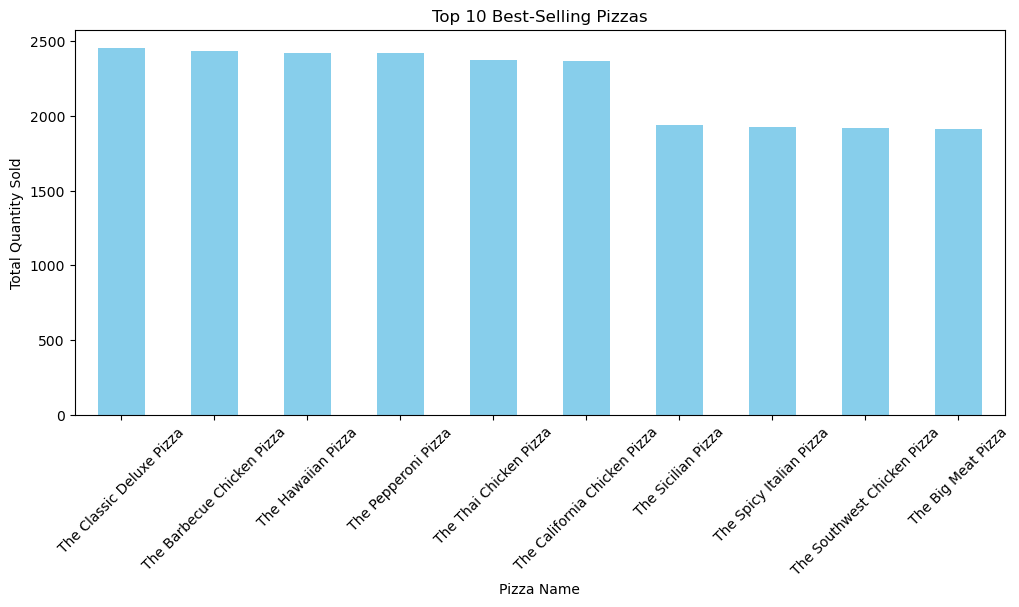

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

top_pizzas = sales_df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
top_pizzas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

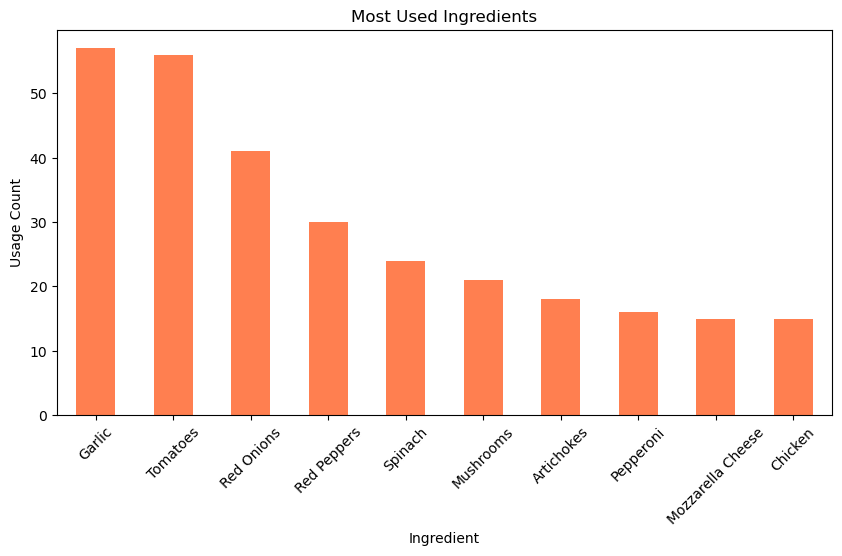

In [52]:
top_ingredients = Ingredients_df['pizza_ingredients'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 5))
top_ingredients.plot(kind='bar', color='coral')
plt.title('Most Used Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.show()

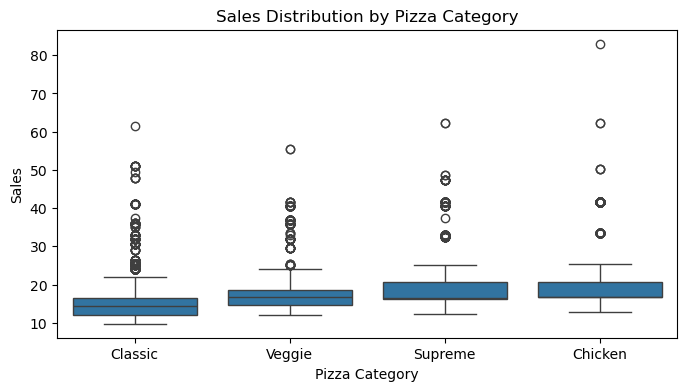

In [53]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='pizza_category', y='total_price', data=sales_df)
plt.title('Sales Distribution by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Sales')
plt.show()

In [53]:
sales_df1=sales_df.copy()

In [113]:
sales_df['order_date'] = sales_df['order_date'].astype(str).replace(
    to_replace=r'(\d{1,2})/(\d{1,2})/(\d{4})',
    value=r'\1-\2-\3',  # Just replaces / with -
    regex=True
)

In [55]:
sales_df['order_date'] = sales_df['order_date'].astype(str).replace(
    to_replace=r'(\d{1,2})/(\d{1,2})/(\d{4})',
    value=r'\1-\2-\3',
    regex=True
)

# Step 2: Format all dates to DD-MM-YYYY with leading zeros
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y')

In [57]:
sales_df['week_number'] = pd.to_datetime(sales_df['order_date'], format='%d-%m-%Y').dt.isocalendar().week

In [59]:
sales_df['week_number'].unique()

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 53, dtype: UInt32

In [79]:
Ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [77]:
sales_df=aftercol_df.copy()

In [81]:
Ingredients_df['pizza_ingredients'] = Ingredients_df['pizza_ingredients'].replace('?duja Salami', 'Nduja Salami')

In [83]:
sales_df.drop(['pizza_id', 'order_id', 'pizza_ingredients', 'pizza_name'], axis=1, inplace=True)

In [85]:
# Group by pizza_name_id and week_number and calculate total sales (or any other aggregation)
grouped_df = sales_df.groupby(['pizza_name_id', 'week_number']).agg({'quantity': 'sum'}).reset_index()

In [87]:
grouped_df

,pizza_name_id,week_number,quantity
0,bbq_ckn_l,1,17
1,bbq_ckn_l,2,13
2,bbq_ckn_l,3,25
3,bbq_ckn_l,4,15
4,bbq_ckn_l,5,29
...,...,...,...
4750,veggie_veg_s,49,12
4751,veggie_veg_s,50,9
4752,veggie_veg_s,51,6
4753,veggie_veg_s,52,6


In [89]:
pizza_dfs = {}
pizza_ids = grouped_df['pizza_name_id'].unique()

for pizza in pizza_ids:
    pizza_dfs[pizza] = grouped_df[grouped_df['pizza_name_id'] == pizza].reset_index(drop=True)

In [91]:
from prophet import Prophet
import pandas as pd

models = {}
forecasts = {}

for pizza in pizza_ids:
    # Prepare data for Prophet
    df = pizza_dfs[pizza][['week_number', 'quantity']].copy()
    
    # Convert week_number to a date starting from 2016 January 1st week
    df['ds'] = pd.to_datetime('2016-01-04') + pd.to_timedelta((df['week_number'] - 1) * 7, unit='D')
    df = df.rename(columns={'quantity': 'y'})
    
    # Create and fit model
    model = Prophet()
    model.fit(df[['ds', 'y']])
    
    # Create future dataframe using week numbers
    future = model.make_future_dataframe(periods=7, freq='W')
    forecast = model.predict(future)

    # Map back to week number
    forecast['week_number'] = forecast['ds'].dt.isocalendar().week

    # Store model and forecast
    models[pizza] = model
    forecasts[pizza] = forecast[['week_number', 'yhat']]

21:52:53 - cmdstanpy - INFO - Chain [1] start processing
21:52:53 - cmdstanpy - INFO - Chain [1] done processing
21:52:53 - cmdstanpy - INFO - Chain [1] start processing
21:52:53 - cmdstanpy - INFO - Chain [1] done processing
21:52:54 - cmdstanpy - INFO - Chain [1] start processing
21:52:54 - cmdstanpy - INFO - Chain [1] done processing
21:52:57 - cmdstanpy - INFO - Chain [1] start processing
21:52:58 - cmdstanpy - INFO - Chain [1] done processing
21:52:58 - cmdstanpy - INFO - Chain [1] start processing
21:52:58 - cmdstanpy - INFO - Chain [1] done processing
21:52:58 - cmdstanpy - INFO - Chain [1] start processing
21:52:59 - cmdstanpy - INFO - Chain [1] done processing
21:52:59 - cmdstanpy - INFO - Chain [1] start processing
21:52:59 - cmdstanpy - INFO - Chain [1] done processing
21:52:59 - cmdstanpy - INFO - Chain [1] start processing
21:53:00 - cmdstanpy - INFO - Chain [1] done processing
21:53:00 - cmdstanpy - INFO - Chain [1] start processing
21:53:00 - cmdstanpy - INFO - Chain [1]

In [93]:
purchase_order = pd.DataFrame()
for pizza in pizza_ids:
    forecast = forecasts[pizza][['week_number', 'yhat']].rename(
        columns={'week_number': 'week_number', 'yhat': 'predicted_quantity'}
    )
    forecast['pizza_name_id'] = pizza
    
    # Merge with ingredient data
    merged = forecast.merge(Ingredients_df, on='pizza_name_id', how='left')

    # Use the correct column for ingredient quantity per pizza
    merged['total_ingredient_needed'] = merged['predicted_quantity'] * merged['Items_Qty_In_Grams']

    purchase_order = pd.concat([purchase_order, merged])
# Display the final purchase order
print(purchase_order.head())

   week_number  predicted_quantity pizza_name_id                  pizza_name  \
0            1           20.598004     bbq_ckn_l  The Barbecue Chicken Pizza   
1            1           20.598004     bbq_ckn_l  The Barbecue Chicken Pizza   
2            1           20.598004     bbq_ckn_l  The Barbecue Chicken Pizza   
3            1           20.598004     bbq_ckn_l  The Barbecue Chicken Pizza   
4            1           20.598004     bbq_ckn_l  The Barbecue Chicken Pizza   

   pizza_ingredients  Items_Qty_In_Grams  total_ingredient_needed  
0  Barbecued Chicken                40.0                823.92016  
1        Red Peppers                15.0                308.97006  
2      Green Peppers                20.0                411.96008  
3           Tomatoes                30.0                617.94012  
4         Red Onions                60.0               1235.88024  


In [95]:
purchase_order_summary = purchase_order.groupby('pizza_ingredients')['total_ingredient_needed'].sum().reset_index()
print(purchase_order_summary)

          pizza_ingredients  total_ingredient_needed
0             Alfredo Sauce             17283.448932
1                 Anchovies             47901.160714
2                Artichokes            142106.238450
3                   Arugula             16572.542359
4             Asiago Cheese             80026.226665
..                      ...                      ...
59       Sun-dried Tomatoes             21309.751039
60  Thai Sweet Chilli Sauce             64306.314352
61                    Thyme              2763.299440
62                 Tomatoes            668927.171447
63                 Zucchini             54260.505639

[64 rows x 2 columns]


In [99]:
purchase_order1 = purchase_order.copy()

In [101]:
merged_df = sales_df.merge(purchase_order, on=['week_number', 'pizza_name_id'], how='inner')
actual = merged_df['quantity']
predicted = merged_df['predicted_quantity']

In [103]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(actual, predicted)
print(f"MAPE: {mape:.2f}%")

MAPE: 12.24%


In [105]:
purchase_order_summary.head(10)

,pizza_ingredients,total_ingredient_needed
0,Alfredo Sauce,17283.448932
1,Anchovies,47901.160714
2,Artichokes,142106.238450
3,Arugula,16572.542359
4,Asiago Cheese,80026.226665
5,Bacon,568687.508596
6,Barbecue Sauce,30000.694373
7,Barbecued Chicken,87187.914272
8,Beef Chuck Roast,168004.953839
9,Blue Cheese,46990.048812
